In [109]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [110]:
GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["SERPER_API_KEY"] = SERPER_API_KEY

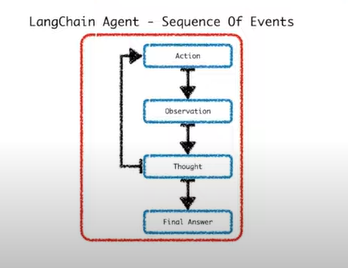

1. Simple AI Assistant
2. AI Chat Assistant
3. RAG
4. Tools & Agents

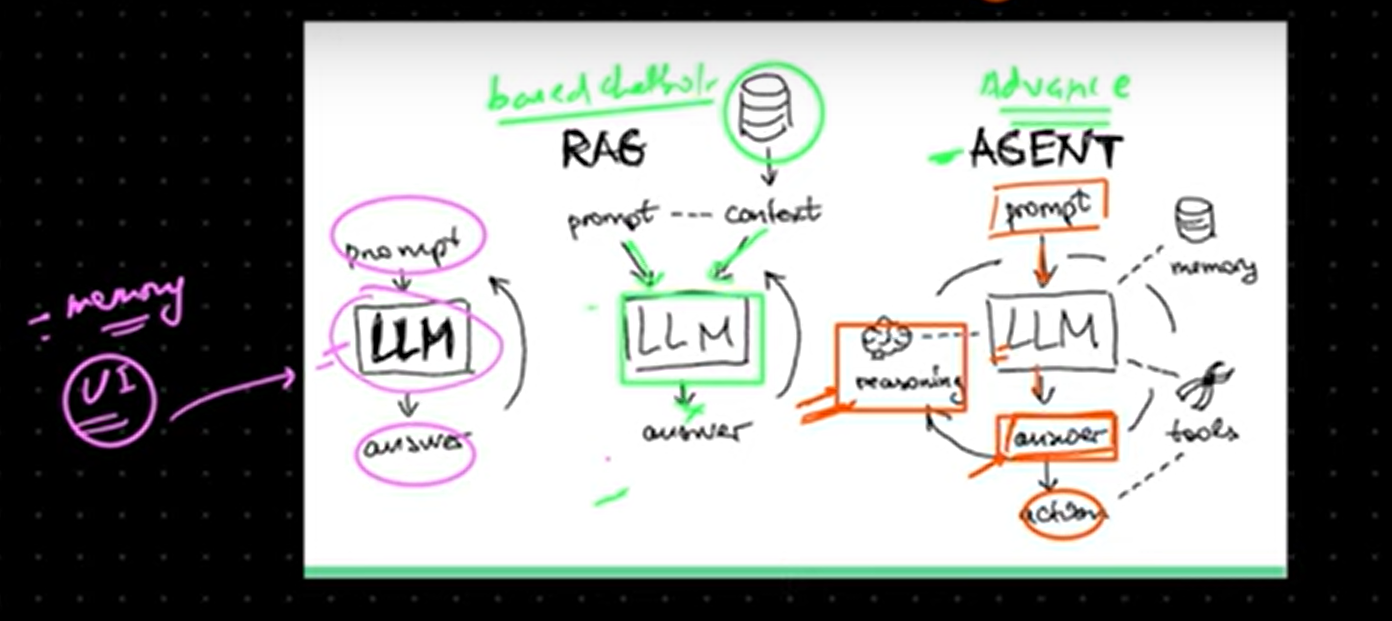

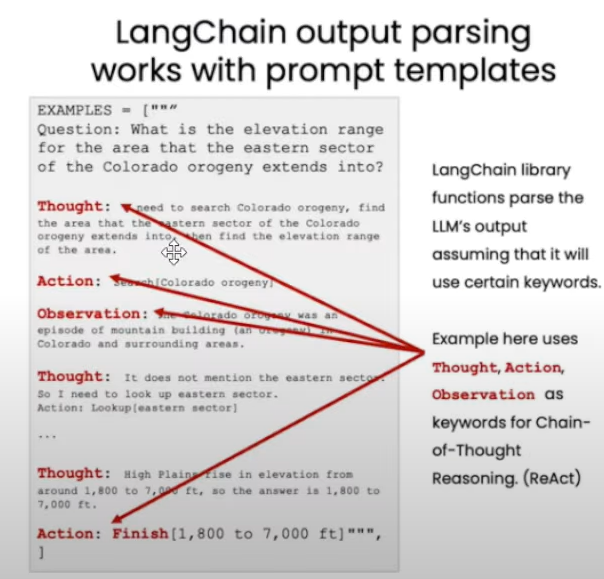

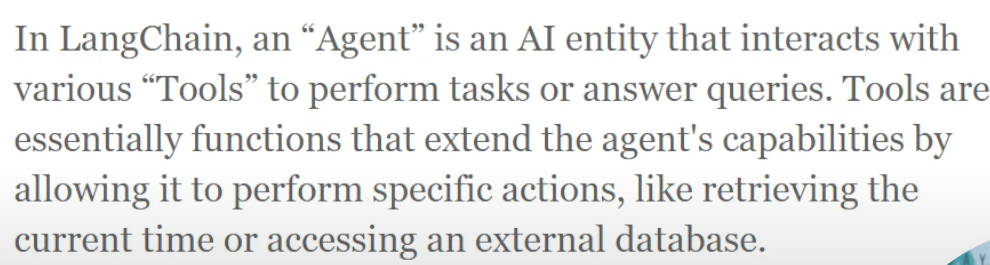

Langgraph --> Agents(Advanced Assistants working inside loop, Have thinking capability) are external functions


Prompt -- LLM -- Output -- Parser                              
Drawback of chaining: We cannot check whether the op is correct?



In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\akash.ravichandran\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an admini

In [106]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
llm_google = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0, max_tokens=None)

In [6]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model_name="Gemma2-9b-It")

In [7]:
llm_groq.invoke("What is the capital of India?").content

'The capital of India is **New Delhi**. \n'

In [8]:
from langchain_core.output_parsers import StrOutputParser

In [9]:
parser = StrOutputParser()
response = parser.invoke(llm_groq.invoke("What is the capital of India?"))
response

'The capital of India is **New Delhi**. \n'

### Pre-defined Tools

In [19]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper
api_wrapper = WikipediaAPIWrapper()
tool1 = WikipediaQueryRun(api_wrapper=api_wrapper)
tool1.run({'query':"What is the weather in Chennai?"})

'Page: Chennai\nSummary: Chennai ( ; Tamil: [ˈt͡ɕenːaɪ̯], ISO: Ceṉṉai), formerly known as Madras, is the capital and largest city of Tamil Nadu, the southernmost state of India. It is located on the Coromandel Coast of the Bay of Bengal. According to the 2011 Indian census, Chennai is the sixth-most populous city in India and forms the fourth-most populous urban agglomeration. Incorporated in 1688, the Greater Chennai Corporation is the oldest municipal corporation in India and the second oldest in the world after London.\nHistorically, the region was part of the Chola, Pandya, Pallava and Vijayanagara kingdoms during various eras. The coastal land which then contained the fishing village Madrasapattinam, was purchased by the British East India Company from the Nayak ruler Chennapa Nayaka in the 17th century. The British garrison established the Madras city and port and built Fort St. George, the first British fortress in India. The city was made the winter capital of the Madras Presid

In [ ]:
from langchain_community.tools import YouTubeSearchTool
tool2 = YouTubeSearchTool()
tool2.run("Krish Naik")

"['https://www.youtube.com/watch?v=sL8PjVG2fHw&pp=ygUKS3Jpc2ggTmFpaw%3D%3D', 'https://www.youtube.com/watch?v=FY6Hv4SH_Rk&pp=ygUKS3Jpc2ggTmFpaw%3D%3D']"

In [18]:
from langchain_community.tools.tavily_search import TavilySearchResults
tool3 = TavilySearchResults()
tool3.run({"query": "who is mohandas karamchand gandhi?"})

[{'url': 'https://historycooperative.org/stay-story-mahatma-gandhi/',
  'content': "Mahatma Gandhi, also known as Mohandas Karamchand Gandhi, was a prominent figure in India's struggle for independence from British rule. His approach to non-violent protest and civil disobedience became a beacon for peaceful movements worldwide. Gandhi's beliefs in simplicity, non-violence, and truth had a profound impact on the world, influencing other leaders like Martin Luther"},
 {'url': 'https://www.britannica.com/summary/Mahatma-Gandhi',
  'content': 'Mahatma Gandhi summary\nExplore the life of Mahatma Gandhi as a political and social activist\nMahatma Gandhi, byname of Mohandas Karamchand Gandhi,\n(born Oct. 2, 1869, Porbandar, India—died Jan. 30, 1948, Delhi), Preeminent leader of Indian nationalism and prophet of nonviolence in the 20th century.\n He refashioned the Indian National Congress into an effective political instrument of Indian nationalism and undertook major campaigns of nonviolent 

### Create a Custom tool

In [31]:
from langchain.agents import tool
@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word"""
    return len(word)

In [25]:
get_word_length.invoke("90")

2

In [32]:
print(get_word_length.name)
print(get_word_length.description)
print(get_word_length.args)

get_word_length
Returns the length of a word
{'word': {'title': 'Word', 'type': 'string'}}


In [ ]:
# tool3.invoke("What is the weather in Chennai?")

[{'url': 'https://www.weatherapi.com/',
  'content': "{'location': {'name': 'Chennai', 'region': 'Tamil Nadu', 'country': 'India', 'lat': 13.0833, 'lon': 80.2833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1731407877, 'localtime': '2024-11-12 16:07'}, 'current': {'last_updated_epoch': 1731407400, 'last_updated': '2024-11-12 16:00', 'temp_c': 28.3, 'temp_f': 82.9, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 15.9, 'wind_kph': 25.6, 'wind_degree': 82, 'wind_dir': 'E', 'pressure_mb': 1007.0, 'pressure_in': 29.74, 'precip_mm': 0.02, 'precip_in': 0.0, 'humidity': 89, 'cloud': 75, 'feelslike_c': 33.7, 'feelslike_f': 92.6, 'windchill_c': 27.1, 'windchill_f': 80.8, 'heatindex_c': 31.0, 'heatindex_f': 87.8, 'dewpoint_c': 24.2, 'dewpoint_f': 75.5, 'vis_km': 5.0, 'vis_miles': 3.0, 'uv': 0.5, 'gust_mph': 29.6, 'gust_kph': 47.7}}"},
 {'url': 'https://www.timeanddate.com/weather/india/chennai',
  'content': 'Current 

#### Function Tool Calling Agent

In [92]:
from langchain import hub
prompt=hub.pull("hwchase17/openai-functions-agent")

d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [40]:
prompt.messages

[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [44]:
tools = [tool3]

In [35]:
from langchain.agents import create_tool_calling_agent, AgentExecutor

In [48]:
agent = create_tool_calling_agent(llm=llm_groq,
                          tools=tools, 
                          prompt=prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [ ]:
agent_executor.invoke({'input':"What is the weather in Chennai?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in Chennai'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'Chennai', 'region': 'Tamil Nadu', 'country': 'India', 'lat': 13.0833, 'lon': 80.2833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1731408514, 'localtime': '2024-11-12 16:18'}, 'current': {'last_updated_epoch': 1731408300, 'last_updated': '2024-11-12 16:15', 'temp_c': 28.3, 'temp_f': 82.9, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 15.9, 'wind_kph': 25.6, 'wind_degree': 82, 'wind_dir': 'E', 'pressure_mb': 1007.0, 'pressure_in': 29.74, 'precip_mm': 0.02, 'precip_in': 0.0, 'humidity': 89, 'cloud': 75, 'feelslike_c': 33.7, 'feelslike_f': 92.6, 'windchill_c': 27.1, 'windchill_f': 80.8, 'heatindex_c': 31.0, 'heatindex_f': 87.8, 'dewpoint_c': 24.2, 'dewpoint_f': 75.5, 'vis_km': 5.0, 'vis_miles': 3.0, 'uv': 0.5, 'gust

{'input': 'What is the weather in Chennai?',
 'output': 'Chennai, India will have a temperature of 28.3 degrees Celsius on 2024-11-12 at 16:15. \n'}

In [53]:
agent_executor.invoke({'input':"Who won ipl 2023?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'Who won ipl 2023'}`


[{'url': 'https://www.hindustantimes.com/cricket/csk-vs-gt-live-score-ipl-2023-final-chennai-super-kings-vs-gujarat-titans-reserve-day-ahmedabad-latest-scorecard-updates-101685349753890.html', 'content': "CSK vs GT, IPL 2023 Final Highlights: Jadeja's last ball boundary helps Chennai win 5th title in thriller. CSK vs GT, IPL 2023 Final Highlights: Ravindra Jadeja hit a four off the last ball as"}, {'url': 'https://www.iplt20.com/news/3976/tata-ipl-2023-final-csk-vs-gt-match-reportOverall', 'content': 'TATA IPL 2023, Final CSK Vs GT - Match Report. Ravindra Jadeja provided a grandstand finish, hitting a six and a four with 10 needed off the last two balls, to power Chennai Super Kings to their fifth IPL title as they beat defending champions Gujarat Titans by five wickets (DLS Method) in a thriller at the Narendra Modi Stadium in Ahmedabad.'}, {'url': 'https://www.espnc

{'input': 'Who won ipl 2023?', 'output': 'Chennai Super Kings (CSK) \n'}

#### Tool Calling Agent with multiple tools

In [54]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [56]:
loader = WebBaseLoader("https://www.aljazeera.com/sports/2024/6/30/how-incredible-india-won-the-icc-t20-world-cup-2024-to-end-13-year-wait")
docs = loader.load()

In [57]:
documents = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200
).split_documents(docs)

In [59]:
vector = FAISS.from_documents(documents,embeddings)
retriever = vector.as_retriever()

In [61]:
retriever.invoke("Who won the world cup 2014?")[0]

Document(metadata={'source': 'https://www.aljazeera.com/sports/2024/6/30/how-incredible-india-won-the-icc-t20-world-cup-2024-to-end-13-year-wait', 'title': "How incredible India won ICC T20 World Cup 2024 to end their 13-year wait | ICC Men's T20 World Cup | Al Jazeera", 'description': 'Between Kohli’s vintage innings and Pandya’s moment of redemption, Rohit’s India end their long wait for a world title.', 'language': 'en'}, page_content='Kohli had always risen above his extravagant talents in World Cups, even when India were unable to claim the ultimate prize. And in this particular format, he was always the king without a crown. No more.\nBut he did not do it alone. Axar Patel repaid his team’s faith in promoting him up the order and played his pinch-hitter’s role to perfection. When he fell, Shivam Dube followed suit in a seamless transition.\nVirat Kohli and Rohit Sharma celebrate with the trophy [Chandan Khanna/AFP]\nClassy Klaasen lifts South Africa to the precipice\nWhen the tim

In [62]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool = create_retriever_tool(
    retriever,
    "ICC World cup 2024",
    "Search for information about ICC World cup 2024. Kohli lits the finals up!",
)

In [63]:
tools = [tool3, retriever_tool]

In [64]:
agent = create_tool_calling_agent(llm=llm_groq,
                          tools=tools, 
                          prompt=prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [68]:
agent_executor.invoke({'input':"Who is the star player in the world cup 2024 final?"})



> Entering new AgentExecutor chain...

Invoking: `ICC World cup 2024` with `{'query': 'Who is the star player in the world cup 2024 final?'}`


Kohli had always risen above his extravagant talents in World Cups, even when India were unable to claim the ultimate prize. And in this particular format, he was always the king without a crown. No more.
But he did not do it alone. Axar Patel repaid his team’s faith in promoting him up the order and played his pinch-hitter’s role to perfection. When he fell, Shivam Dube followed suit in a seamless transition.
Virat Kohli and Rohit Sharma celebrate with the trophy [Chandan Khanna/AFP]
Classy Klaasen lifts South Africa to the precipice
When the time came to defend what was a formidable total for a World Cup final, India’s menacing bowling attack took on their now familiar The Terminator avatar. They did not feel pity, or remorse, or fear. And they absolutely would not stop. Never. Not until South Africa’s hopes of making history were dead and 

{'input': 'Who is the star player in the world cup 2024 final?',
 'output': 'Virat Kohli \n'}

In [69]:
agent_executor.invoke({'input':"What is the weather in Chennai?"})



> Entering new AgentExecutor chain...

Invoking: `tavily_search_results_json` with `{'query': 'weather in Chennai'}`


[{'url': 'https://www.weatherapi.com/', 'content': "{'location': {'name': 'Chennai', 'region': 'Tamil Nadu', 'country': 'India', 'lat': 13.0833, 'lon': 80.2833, 'tz_id': 'Asia/Kolkata', 'localtime_epoch': 1731412453, 'localtime': '2024-11-12 17:24'}, 'current': {'last_updated_epoch': 1731411900, 'last_updated': '2024-11-12 17:15', 'temp_c': 28.0, 'temp_f': 82.4, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 9.6, 'wind_kph': 15.5, 'wind_degree': 83, 'wind_dir': 'E', 'pressure_mb': 1007.0, 'pressure_in': 29.74, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 89, 'cloud': 75, 'feelslike_c': 32.8, 'feelslike_f': 91.1, 'windchill_c': 27.2, 'windchill_f': 80.9, 'heatindex_c': 31.0, 'heatindex_f': 87.8, 'dewpoint_c': 24.1, 'dewpoint_f': 75.3, 'vis_km': 3.0, 'vis_miles': 1.0, 'uv': 0.0, 'gust_m

{'input': 'What is the weather in Chennai?',
 'output': 'The weather in Chennai is currently 28.0 degrees Celsius and partly cloudy.'}

#### ReAct Agent (Reasoning + Acting):
Definition:

The ReAct framework combines reasoning and acting in a single loop to handle tasks. The agent uses natural language reasoning (thinking through steps) and task actions (performing tasks like calculations or data retrieval).

The agent uses a combination of reasoning steps to guide actions in real-time, using feedback from those actions to further inform the next step in reasoning.

How it works:

Step 1: The agent receives a question or task.
Step 2: It reasons aloud (in natural language) about how to solve it.
Step 3: Based on its reasoning, it takes actions (e.g., searching a database, calculating something).
Step 4: The results of these actions are integrated into its reasoning and may trigger further actions.
Step 5: It repeats the process until it arrives at a solution.
Key points:

Combines thinking and doing (reasoning and actions).
Performs iterative steps, updating its process based on action results.
Typically handles complex decision-making scenarios.
Example:

Original task: “Calculate the total number of apples in a basket if there are 4 baskets and 7 apples in each.”
Reasoning: "I need to multiply 4 by 7 to get the total number of apples."
Action: Perform the multiplication.
Result: "There are 28 apples."
Reasoning: "I am done."

In [80]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import Tool,create_react_agent,AgentExecutor
from langchain_core.prompts import PromptTemplate

In [83]:
google_search = GoogleSerperAPIWrapper()
tools = [
    Tool(
        name = "Intermediate Answer",
        func = google_search.run,
        description = "useful for when you need to ask with search",
        verbose=True
    )
]

In [84]:
template = '''Answer the following questions as best you can. You have access to the following tools:
{tools}
Use the following format:
Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
Begin!
Question: {input}
Thought:{agent_scratchpad}'''

In [85]:
prompt = PromptTemplate.from_template(template)

In [86]:
react_search_agent = create_react_agent(llm_groq, tools, prompt)

In [87]:
agent_executor = AgentExecutor(
    agent=react_search_agent,
    tools=tools,
    verbose=True,
    return_intermediate_steps=True
)

In [89]:
agent_executor.invoke({"input": "Where is the hometown of 2016 t20 world cup winning captain and his score?"})



> Entering new AgentExecutor chain...
Thought: I need to know who the captain of the 2016 T20 World Cup winning team was and then find his hometown and score. 
Action: Intermediate Answer
Action Input: Who won the 2016 T20 World Cup?West Indies cricket teamThought: I need to know who the captain of the West Indies cricket team was in 2016. 
Action: Intermediate Answer
Action Input: Who was the captain of the West Indies cricket team in 2016?36 ; Jason Holder ; 2015/16 · 2015/16 · 2016 ... Virat Kohli became the first captain of India to win two Tests in the West Indies. Checkout team and player detaills of West Indies squad - World T20, 2016 Squad details on ESPNcricinfo.com. ENG vs WI ; Player Of The Match. West Indies. Marlon Samuels ; Player Of The Series. India. Virat Kohli ; Series result, West Indies won the 2015/16 World T20. With the World Twenty20 tournament starting March 8 in India, West Indies captain Darren Sammy told reporters the team is facing an 80 percent pay cut co

{'input': 'Where is the hometown of 2016 t20 world cup winning captain and his score?',
 'output': "Darren Sammy is from Micoud, Saint Lucia.  \n\n\n\nLet me know if you'd like to know more about him or the 2016 T20 World Cup!",
 'intermediate_steps': [(AgentAction(tool='Intermediate Answer', tool_input='Who won the 2016 T20 World Cup?', log='Thought: I need to know who the captain of the 2016 T20 World Cup winning team was and then find his hometown and score. \nAction: Intermediate Answer\nAction Input: Who won the 2016 T20 World Cup?'),
   'West Indies cricket team'),
  (AgentAction(tool='Intermediate Answer', tool_input='Who was the captain of the West Indies cricket team in 2016?', log='Thought: I need to know who the captain of the West Indies cricket team was in 2016. \nAction: Intermediate Answer\nAction Input: Who was the captain of the West Indies cricket team in 2016?'),
   "36 ; Jason Holder ; 2015/16 · 2015/16 · 2016 ... Virat Kohli became the first captain of India to win

## ReAct Agent with Custom tools

In [95]:
# Custom tool for the Agent 
@tool
def get_employee_id(name):
  """
  To get employee id, it takes employee name as arguments
  name(str): Name of the employee
  """
  fake_employees = {
    "Alice": "E001",
    "Bob": "E002",
    "Charlie": "E003",
    "Diana": "E004",
    "Evan": "E005",
    "Fiona": "E006",
    "George": "E007",
    "Hannah": "E008",
    "Ian": "E009",
    "Jasmine": "E010"}
  
  return fake_employees.get(name,"Employee not found")

In [96]:
# Custom tool for the Agent 
@tool
def get_employee_salary(employee_id):
  """
  To get the salary of an employee, it takes employee_id as input and return salary
  """
  employee_salaries = {
    "E001": 56000,
    "E002": 47000,
    "E003": 52000,
    "E004": 61000,
    "E005": 45000,
    "E006": 58000,
    "E007": 49000,
    "E008": 53000,
    "E009": 50000,
    "E010": 55000
    }
  return employee_salaries.get(employee_id,"Employee not found")

In [97]:
# Saved React Prompt in langchain hub, we could manually type the prompt as well.
prompt = hub.pull("hwchase17/react")

d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [98]:
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [99]:
tools = [get_employee_id, get_employee_salary]
agent = create_react_agent(llm_groq, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)
agent_executor.invoke({"input":"What is the salary of Evan?"})



> Entering new AgentExecutor chain...
Thought: I need to first find Evan's employee ID and then use that to get his salary. 
Action: get_employee_id
Action Input: EvanE005Thought: Now that I have Evan's employee ID, I can use it to get his salary.
Action: get_employee_salary
Action Input: E00545000Thought: I now know the final answer
Final Answer: 45000 


> Finished chain.


{'input': 'What is the salary of Evan?', 'output': '45000'}

In [100]:
agent_executor.invoke({"input":"What is the salary of Akash?"})



> Entering new AgentExecutor chain...
Thought: I need to find Akash's employee ID first and then use that to get his salary.
Action: get_employee_id
Action Input: AkashEmployee not foundQuestion: What is the salary of Akash?
Thought: I need to find Akash's employee ID first and then use that to get his salary.
Action: get_employee_id
Action Input: AkashEmployee not foundQuestion: What is the salary of Akash?
Thought: I need to find Akash's employee ID first and then use that to get his salary.
Action: get_employee_id
Action Input: AkashEmployee not foundThought: Akash's employee ID is not found.
Final Answer: Employee not found 




> Finished chain.


{'input': 'What is the salary of Akash?', 'output': 'Employee not found'}

#### Self-Ask with Search Agent:
Definition:

This approach allows the AI to ask itself follow-up questions when it doesn't immediately know the answer. It performs a recursive questioning process to break down complex queries into smaller, more manageable ones.
Once the AI generates these follow-up questions, it performs an external search (e.g., through Google or an internal database) to gather the necessary information before formulating a response.
How it works:

Step 1: Receive a complex question.
Step 2: The agent identifies sub-questions or follow-up questions.
Step 3: It performs a search or fetches answers to these questions from external resources (like a web search).
Step 4: The answers are aggregated to provide a complete response.
Key points:

Emphasizes question decomposition.
Relies on external search for sub-questions.
Useful for answering open-ended or broad questions where the answer is not immediately available.
Example:

Original question: “How many moons does Jupiter have?”
Sub-question: “What is Jupiter?” (search)
Sub-question: “What are moons?” (search)
Finally, it retrieves the answer: "Jupiter has 79 moons."

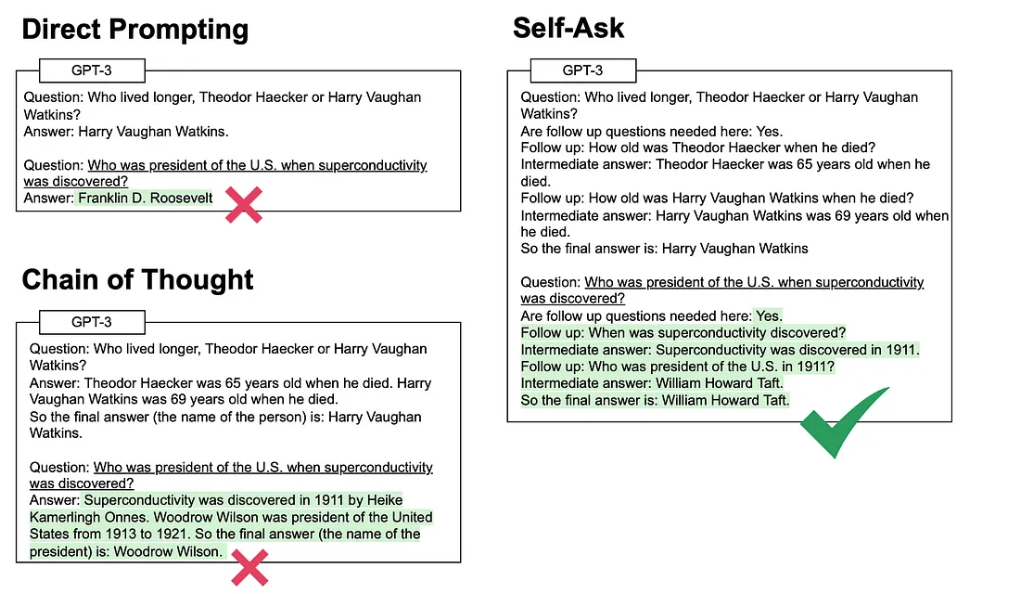

In [112]:
from langchain.utilities import GoogleSerperAPIWrapper
from langchain.agents import Tool, AgentExecutor, create_self_ask_with_search_agent

In [113]:
google_search = GoogleSerperAPIWrapper()
tools = [
    Tool(
        name = "Intermediate Answer",
        func=google_search.run,
        description="Useful for when you need to ask with search.",
        verbose = True
    )
]

In [114]:
prompt = hub.pull("hwchase17/self-ask-with-search")

d:\KnowBase\LANGGRAPH-END-TO-END\venv\lib\site-packages\langsmith\client.py:354: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [115]:
print(prompt.template)

Question: Who lived longer, Muhammad Ali or Alan Turing?
Are follow up questions needed here: Yes.
Follow up: How old was Muhammad Ali when he died?
Intermediate answer: Muhammad Ali was 74 years old when he died.
Follow up: How old was Alan Turing when he died?
Intermediate answer: Alan Turing was 41 years old when he died.
So the final answer is: Muhammad Ali

Question: When was the founder of craigslist born?
Are follow up questions needed here: Yes.
Follow up: Who was the founder of craigslist?
Intermediate answer: Craigslist was founded by Craig Newmark.
Follow up: When was Craig Newmark born?
Intermediate answer: Craig Newmark was born on December 6, 1952.
So the final answer is: December 6, 1952

Question: Who was the maternal grandfather of George Washington?
Are follow up questions needed here: Yes.
Follow up: Who was the mother of George Washington?
Intermediate answer: The mother of George Washington was Mary Ball Washington.
Follow up: Who was the father of Mary Ball Washin

In [116]:
agent = create_self_ask_with_search_agent(llm=llm_groq, tools=tools, prompt=prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True, handle_parsing_errors=True)

In [118]:
agent_executor.invoke({"input":"Who is the current indian team cricket captain?"})



> Entering new AgentExecutor chain...
Yes.

Follow up:  What is the name of the current Indian cricket team captain? Rohit Sharma is current captain of the men's team in Tests and ODIs and Harmanpreet Kaur is current captain of women's team in all Formats. India national cricket team ; Rohit Sharma · Suryakumar Yadav · Gautam Gambhir. Suryakumar Yadav is the current captain of the Indian cricket team in T20 Internationals. Jasprit Bumrah is the only bowler to lead India in ... Mahendra Singh Kohli is the current captain of Indian Cricket team. Current captain of Indian cricket team is Rohit Sharma. He is captaining ... Captain: Rohit Sharma (Tests, ODIs), Suryakumar Yadav (T20Is) ; Coach: Gautam Gambhir (head coach), Morne Morkel (bowling coach), Abhishek Nayar (assistant coach) ... List of Captains for India in ODIs ; AM Rahane. 2015-2015, 3 ; RG Sharma. 2017-2024, 48 ; S Dhawan. 2021-2022, 12 ; KL Rahul. 2022-2023, 12 ... India have named Suryakumar Yadav as the captain of their me

APIError: Please reduce the length of the messages or completion.